In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cname = ['chr_name', 'chr_index', 'ref_base', 'A', 'G', 'C', 'T', 'del_count', 'insert_count', 'ambiguous_count', 'deletion', 'insertion', 'ambiguous', 'mut_num']
ls_df_chroms = []
for chroms in [str(i) for i in range(1,23)] + ['X','Y','M']:
    PATH = '../mpileup_pmat_bmat/split_chr/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20_chr%s.bmat' % chroms
    df = pd.read_csv(PATH,names = cname,sep='\t')
    df['all_count'] = df['A'] + df['G'] + df['C'] + df['T']
    # form 4*4 matrix
    ls_base = 'AGCT'
    df_fbase2tbase = pd.DataFrame(np.zeros((4,4)), columns = [i for i in ls_base])
    df_fbase2tbase.index = [i for i in ls_base[::-1]]
    # row from base
    # col to base
    for fbase in ls_base:
        df_fbase = df[df['ref_base']==fbase]
        base_total_count = df_fbase['all_count'].sum()
        print(chroms,fbase,end='...\n')
        for tbase in ls_base:
            df_fbase2tbase.loc[fbase,tbase] = (df_fbase[tbase].sum())/base_total_count
        del df_fbase
        del base_total_count
    ls_df_chroms.append([chroms,df_fbase2tbase])
    del df_fbase2tbase
ls_df_chroms

! ! ! ! 

Text(0.5, 1.0, 'chrY')

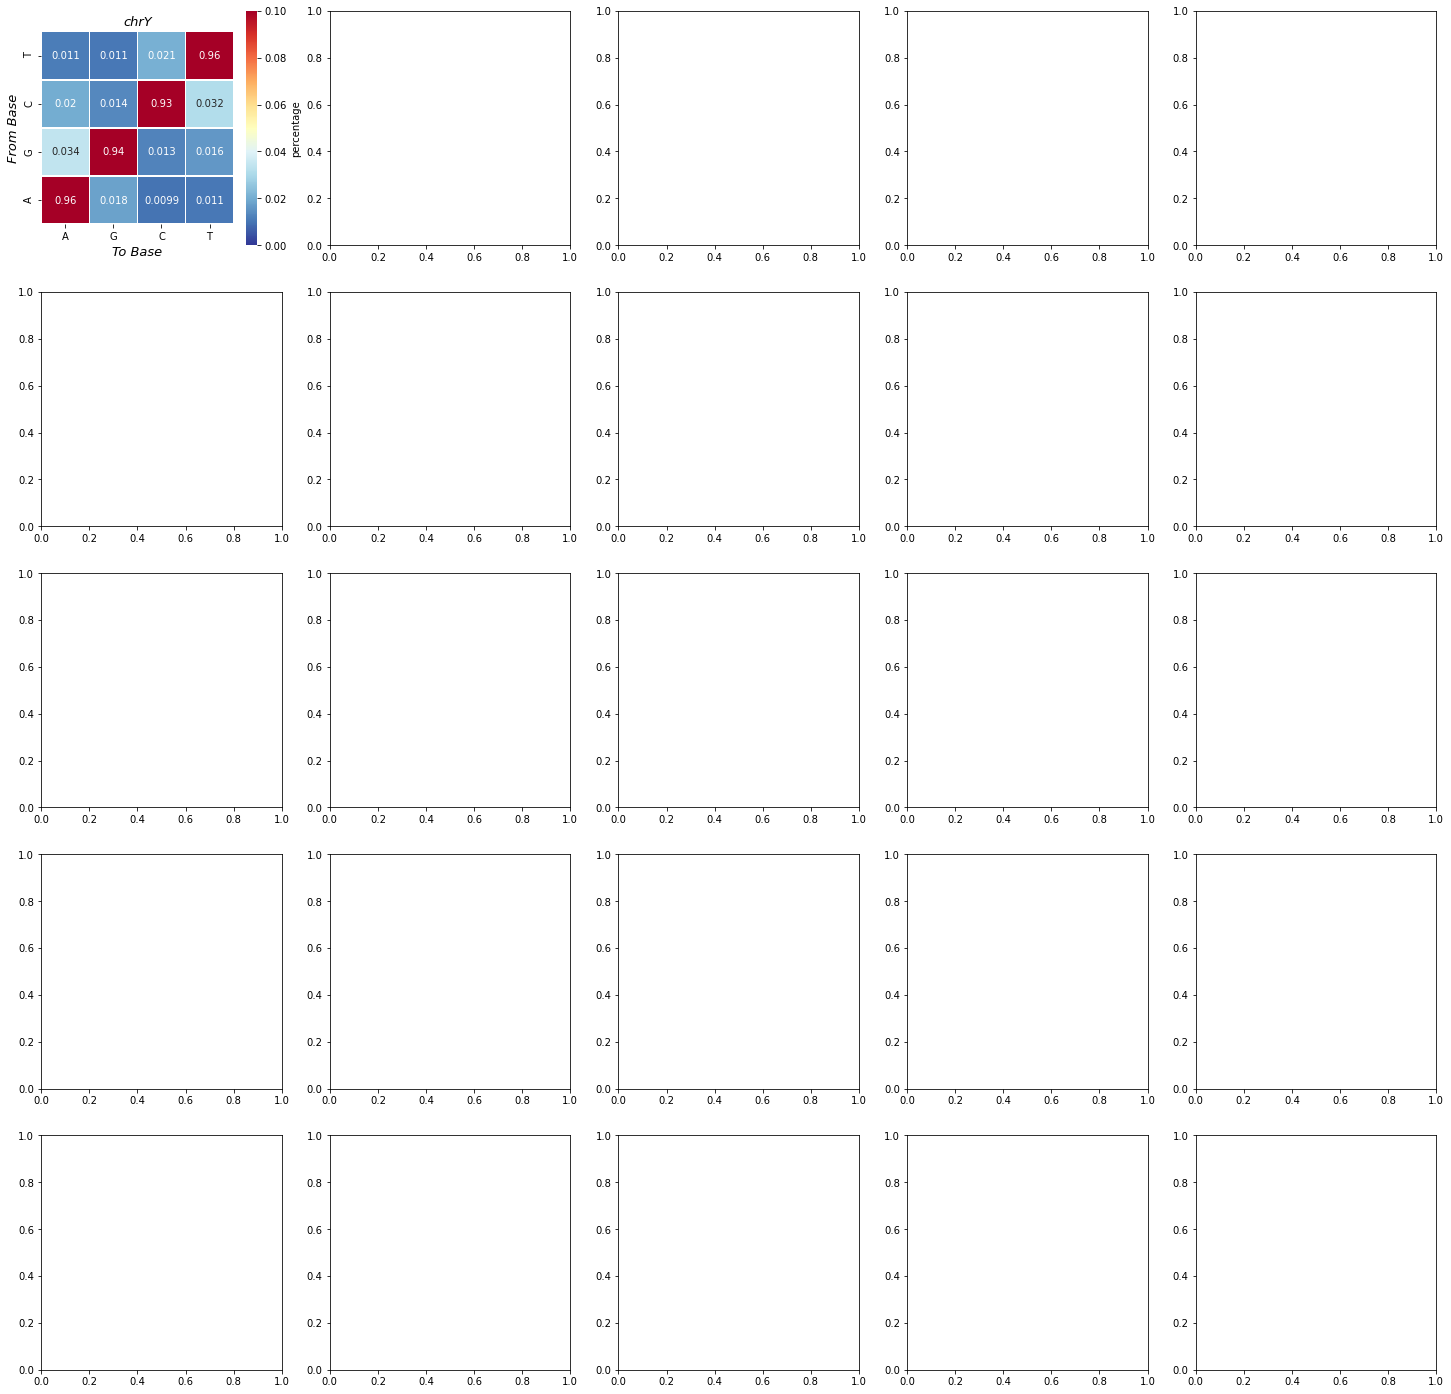

In [74]:

    
    # plot
    fig,ax = plt.subplots(5,5,figsize=(5*5,5*5))


    sns.heatmap(
                df_fbase2tbase, 
                vmin = 0,
                vmax = 0.1,
                linewidths = 0.5,
                square = True,
                annot= df_fbase2tbase,
        #         annot= True,
    #             fmt = "d",
                ax = ax[0,0],
                cmap = 'RdYlBu_r',
                cbar_kws={"orientation":"vertical","label": "percentage"}
            )
    ax[0,0].set_xlabel('To Base', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[0,0].set_ylabel('From Base', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[0,0].set_title('chrY',fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')